In [1]:
from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sqlite3

# Data Visualization With Python 

<!-- PELICAN_BEGIN_SUMMARY -->

Data visualizations and static or interactive visualizations are one of the data analysis tools to helping identify outliers
or data transformations and ideals for financial models.

The maximum number of data series per chart in Excel is 255, so using Python to plot a huge dataset is very useful.
<!-- PELICAN_END_SUMMARY -->

**Goal: Use Python to read Excel file and plot visualization chart for financial analysis**<br> -  Example file - Visualize popluation and life expectancy comparison between US and Japan from 1960 to 2017

<br>
**Visualize the data**
    - Compare US and Japan life Expectancy from 1960 to 2017
    - After initial data analysis, sometime we need to reshape the data for further analaysis
    - We can reshape the data format to set index for visualization
    - The maximum number of data series per chart in Excel is 255, this data has 264 columns as data series

<br>
**First Example - Life Expectancy for 265 Countries from 1960 to 2017** <br> - Select specific columns for plot

In [2]:
## Read the file, but don't set index since we will define 'Year' as x-axix
df = pd.read_excel('data/Plot1/LifeChart.xlsx')
year = df['Year']
country = df.loc[:,'Aruba':'Zimbabwe']  
print (country[0:2])

Count_Row=df.shape[0] 
Count_Col=df.shape[1] 
print("There are %s years in this file" % (Count_Row))
print("There are %s countries in this file" % (Count_Col))

       Aruba  Afghanistan     Angola    Albania  Andorra  Arab World  \
0  65.569366    32.337561  33.226024  62.254366      NaN   46.815045   
1  65.988024    32.786976  33.547756  63.273463      NaN   47.397232   

   United Arab Emirates  Argentina    Armenia  American Samoa    ...      \
0             52.288707  65.215537  65.863463             NaN    ...       
1             53.334049  65.338512  66.284390             NaN    ...       

   Virgin Islands (U.S.)    Vietnam    Vanuatu      World      Samoa  Kosovo  \
0              66.224854  59.067024  46.487488  52.585685  49.969512     NaN   
1              66.487976  59.744195  47.088098  53.089030  50.469512     NaN   

   Yemen, Rep.  South Africa     Zambia   Zimbabwe  
0    34.363805     52.226244  45.109805  51.541976  
1    34.473244     52.568732  45.487512  51.914951  

[2 rows x 264 columns]
There are 58 years in this file
There are 265 countries in this file


<br>
**Compare Japan and US life Expectancy from 1960 to 2017**
    - Save the chart as png file, then use the chart for analysis or presentation
    - It's effective to chart the dataset when dealing with huge dataset since Excel limit 255 data series

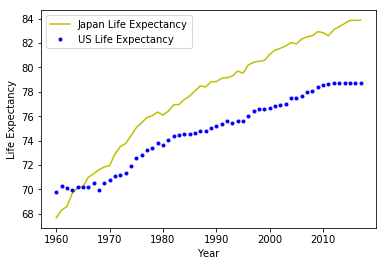

In [3]:
plt.figure(1)
plt.plot(year, country['Japan'], 'y-')
plt.plot(year, country['United_States'], 'b.')
plt.legend(['Japan Life Expectancy','US Life Expectancy'])
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.savefig('data/Plot1/JapanLifeExpectancy.png')

<br>
**Second Example - Population Growth for US and Japan from 1960 to 2017** 
    - Plot population in million
        - How to fix scientific notation le8
    - Plot population growth rate to visualize the comparsion

<br>
**Read the file** <br> - To see the column headings, call the list function and also get a glimpse of the data

In [4]:
data = pd.read_excel('data/Plot1/USALife.xlsx')
data[data.Country == 'USA']
us = data[data.Country == 'USA']
japan = data[data.Country == 'Japan']
data.head(2)  # get the glimpse of the data
list(data)    # see the columns headings

['Year', 'Country', 'Population']

<br>
**Plot shows scientific notation le8 on the top left corner**<br> - 1e8 is standard scientific notion, and it indicates an overall scale factor for the y-axis is too big

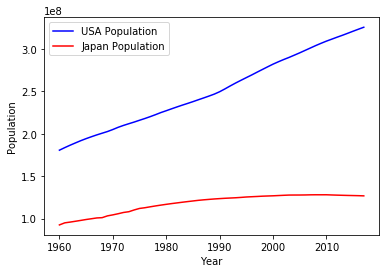

In [5]:
plt.plot(us.Year, us.Population, 'b')
plt.plot(japan.Year, japan.Population, 'r')
plt.legend(['USA Population', 'Japan Population'])
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()

<br>
**Plot a dot line graph with y-axis in million** <br> - million is with 6 zero

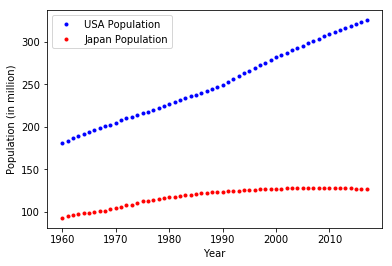

In [6]:
plt.plot(us.Year, us.Population / 10**6, 'b.')
plt.plot(japan.Year, japan.Population / 10**6, 'r.')
plt.legend(['USA Population', 'Japan Population'])
plt.xlabel('Year')
plt.ylabel('Population (in million)')
plt.show()

<br>
**Plot population growth rate - visiualize the growth**
    - Japan population growth rate is starting to be lower than USA from mid-1980
    - Take the first year 1960 as first year, then divide to the following year for growth rate
    - Based on the chart, we can see USA popluation grow faster pace than Japan from mid 1990s

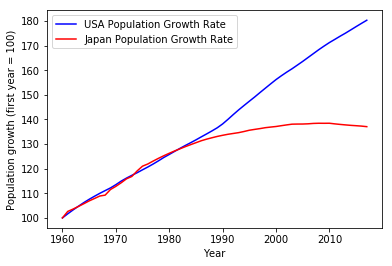

In [7]:
plt.plot(us.Year, us.Population / us.Population.iloc[0] * 100, 'b')
plt.plot(japan.Year, japan.Population / japan.Population.iloc[0] * 100, 'r')
plt.legend(['USA Population Growth Rate', 'Japan Population Growth Rate'])
plt.xlabel('Year')
plt.ylabel('Population growth (first year = 100)')
plt.show()